In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.9 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset, Audio

In [3]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [4]:
!git config --global credential.helper store

Question 2: Use 🤗 Datasets to load the train split of the facebook/voxpopuli dataset in language of your choice in streaming mode.

In [5]:
dataset = load_dataset("facebook/voxpopuli", name="es", split = "train", streaming=True)

In [6]:
dataset

Question 3: Get the third example from the train part of the dataset and explore it. Given the features that this example has, what kinds of audio tasks can you use this dataset for?

In [7]:
example = list(dataset.take(3))[-1]
example

{'audio_id': '20101123-0900-PLENARY-5-es_20101123-10:48:32_0',
 'language': 3,
 'audio': {'path': 'train_part_0/20101123-0900-PLENARY-5-es_20101123-10:48:32_0.wav',
  'array': array([-0.00128174, -0.00112915, -0.00164795, ...,  0.00546265,
         -0.0078125 , -0.01699829]),
  'sampling_rate': 16000},
 'raw_text': 'Señora Presidenta, la competitividad es importante, pero no puede ser el único criterio.',
 'normalized_text': 'señora presidenta la competitividad es importante pero no puede ser el único criterio.',
 'gender': 'female',
 'speaker_id': '96701',
 'is_gold_transcript': True,
 'accent': 'None'}

Question 4: Plot this example’s waveform and spectrogram.

In [8]:
# Listen to the example's audio

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)

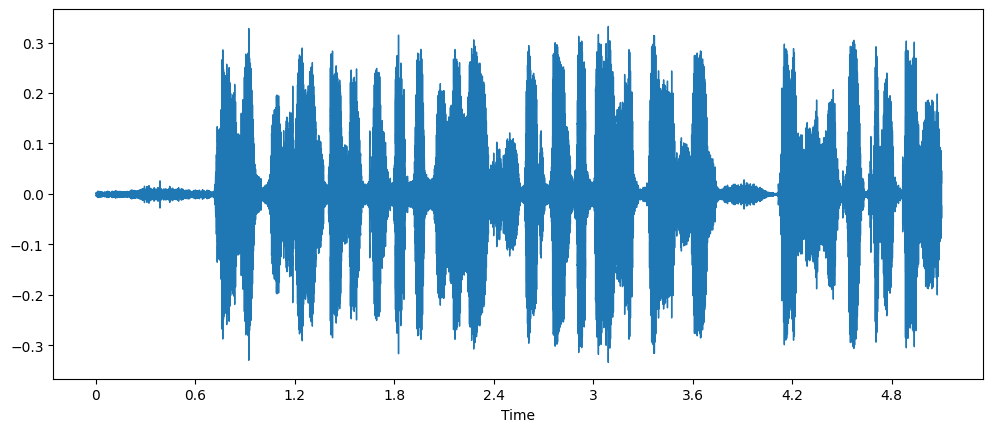

In [9]:
# Waveform

import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

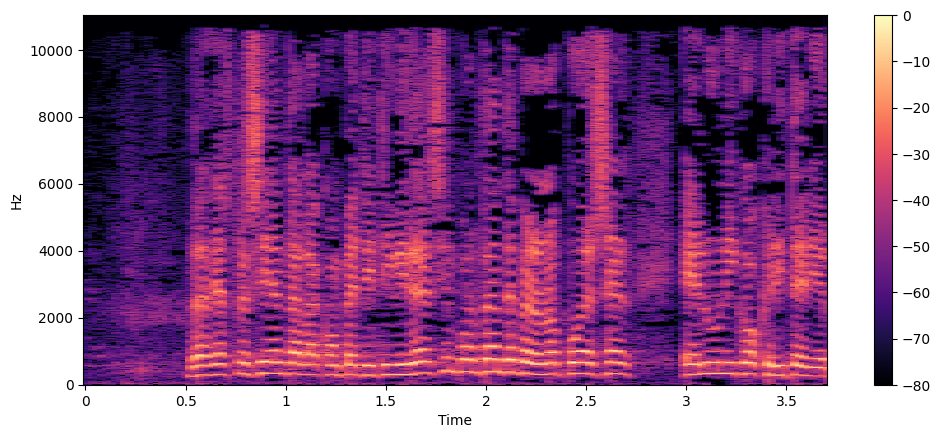

In [10]:
# Spectrogram

import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [11]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-xlsr-53-spanish")

In [12]:
# Compare the results

print(asr(example["audio"]["array"]))
print(example["raw_text"])

{'text': 'gracias presienta la competitividadzs importante pero no puede ser el único criterio'}
Señora Presidenta, la competitividad es importante, pero no puede ser el único criterio.


In [13]:
from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)